# Import Required Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Loading Data

In [56]:
# Load the downloaded data into a DataFrame
df=pd.read_csv('D:/Learning/ML_electroPi/EDA_course/listings2.csv', on_bad_lines='skip')

In [57]:
df.shape

(3239, 75)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3239 non-null   int64  
 1   listing_url                                   3239 non-null   object 
 2   scrape_id                                     3239 non-null   int64  
 3   last_scraped                                  3239 non-null   object 
 4   source                                        3239 non-null   object 
 5   name                                          3239 non-null   object 
 6   description                                   3228 non-null   object 
 7   neighborhood_overview                         2433 non-null   object 
 8   picture_url                                   3239 non-null   object 
 9   host_id                                       3239 non-null   i

In [59]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,108061,https://www.airbnb.com/rooms/108061,20230618033311,2023-06-18,city scrape,Rental unit in Asheville · ★4.51 · 1 bedroom ·...,Walk to town in ten minutes! Monthly rental in...,"I love my neighborhood! Its friendly, easy-goi...",https://a0.muscache.com/pictures/miso/Hosting-...,320564,...,4.80,4.84,4.49,NaN,f,2,2,0,0,0.64
1,4394761,https://www.airbnb.com/rooms/4394761,20230618033311,2023-06-18,city scrape,Rental unit in Asheville · ★4.87 · 2 bedrooms ...,"Clean, adorable space w/ small deck overlookin...","The neighborhood is a friendly, mellow, safe, ...",https://a0.muscache.com/pictures/76195c9a-68ee...,20447538,...,4.97,4.88,4.85,NaN,t,2,2,0,0,3.12
2,4448604,https://www.airbnb.com/rooms/4448604,20230618033311,2023-06-18,city scrape,Guest suite in Asheville · ★4.77 · 1 bedroom ·...,"Our beautiful home is on a quiet hillside, 2 m...",This home is perched on a hill with some views...,https://a0.muscache.com/pictures/2da78921-28aa...,5656896,...,4.94,4.89,4.89,NaN,f,2,2,0,0,5.54
3,4515772,https://www.airbnb.com/rooms/4515772,20230618033311,2023-06-18,city scrape,Home in Asheville · ★4.79 · 2 bedrooms · 2 bed...,"2br,1b, bugalow in Downtown Asheville. Enjoy t...","Close to resturants, grocery stores, mall, hos...",https://a0.muscache.com/pictures/56710558/bab1...,17363326,...,4.99,4.62,4.69,NaN,f,2,2,0,0,0.73
4,4587394,https://www.airbnb.com/rooms/4587394,20230618033311,2023-06-18,city scrape,Cabin in Asheville · ★4.94 · 1 bedroom · 1 bed...,CHANGE YOUR VIEW FOR WORK or RETIREMENT!<br />...,Homeland Park is a neighborhood built as a res...,https://a0.muscache.com/pictures/57609340/7c75...,16339042,...,5.00,4.83,4.92,NaN,f,1,1,0,0,1.55


In [60]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.239000e+03,3.239000e+03,3.239000e+03,3239.000000,3239.000000,3239.000000,0.0,3239.000000,3239.000000,3239.000000,...,2988.000000,2988.000000,2988.000000,2988.000000,0.0,3239.000000,3239.000000,3239.000000,3239.000000,2990.000000
mean,2.146711e+17,2.023062e+13,1.450559e+08,41.206545,60.518679,28792.455696,NaN,35.576312,-82.558220,4.533498,...,4.949187,4.935803,4.876928,4.820264,NaN,8.561593,8.155912,0.357518,0.012349,2.569973
std,3.385774e+17,8.634145e-01,1.446869e+08,177.254010,274.391046,30.571726,NaN,0.049131,0.048249,2.855492,...,0.107905,0.133646,0.165806,0.215328,NaN,21.885105,21.967846,1.215505,0.201528,2.146080
min,1.080610e+05,2.023062e+13,4.134000e+03,1.000000,1.000000,28704.000000,NaN,35.422810,-82.691050,1.000000,...,3.450000,3.000000,2.500000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.614485e+07,2.023062e+13,2.502874e+07,1.000000,1.000000,28801.000000,NaN,35.560585,-82.592560,2.000000,...,4.950000,4.930000,4.840000,4.770000,NaN,1.000000,1.000000,0.000000,0.000000,0.990000
50%,4.534908e+07,2.023062e+13,9.630593e+07,2.000000,3.000000,28804.000000,NaN,35.587260,-82.557530,4.000000,...,4.980000,4.980000,4.920000,4.870000,NaN,1.000000,1.000000,0.000000,0.000000,2.045000
75%,5.900062e+17,2.023062e+13,2.124610e+08,6.000000,7.000000,28806.000000,NaN,35.606236,-82.521310,6.000000,...,5.000000,5.000000,4.970000,4.940000,NaN,4.000000,3.000000,0.000000,0.000000,3.590000
max,9.151074e+17,2.023062e+13,5.201809e+08,1431.000000,2165.000000,28806.000000,NaN,35.656090,-82.457480,16.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,113.000000,113.000000,9.000000,4.000000,14.790000


In [61]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Data Cleaning

In [62]:

df.drop(columns=['scrape_id', 'last_scraped', 'source', 'name','description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since','host_about','host_response_time', 'host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_thumbnail_url', 'host_picture_url','host_neighbourhood', 'host_listings_count','host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude','room_type', 'accommodates', 'bathrooms','bathrooms_text', 'bedrooms', 'beds', 'amenities','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated','calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','reviews_per_month','id', 'listing_url','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','review_scores_value','availability_30', 'availability_60', 'availability_90',
       'availability_365', 'review_scores_location',
       'license', 'instant_bookable'], inplace=True)



In [63]:
df.columns

Index(['host_location', 'property_type', 'price', 'has_availability'], dtype='object')

In [64]:
# Handle missing values
df.dropna(subset=['host_location', 'property_type', 'price',
       'has_availability'],inplace=True)



In [65]:
df.head()

,host_location,property_type,price,has_availability
0,"Asheville, NC",Entire rental unit,$100.00,t
1,"Asheville, NC",Entire rental unit,$114.00,t
2,"Asheville, NC",Entire guest suite,$41.00,t
3,"Fletcher, NC",Entire home,$200.00,t
4,"Asheville, NC",Entire cabin,$75.00,t


In [66]:
#Convert price to numeric
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


C:\Users\SourcesNet\AppData\Local\Temp\ipykernel_22496\1447334128.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


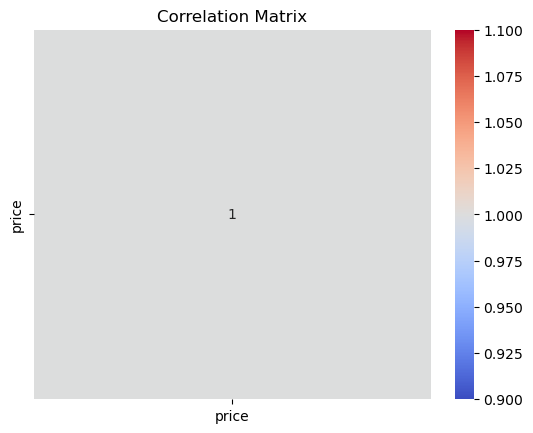

In [67]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Visualization

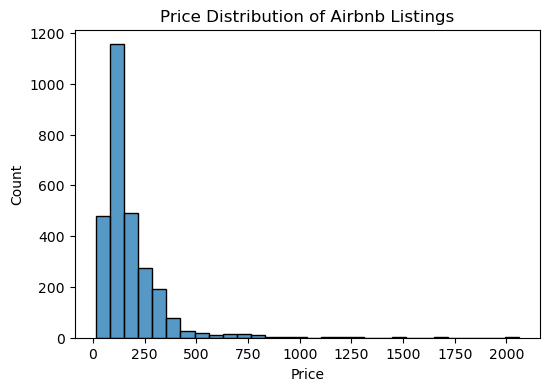

In [68]:
# Data Visualization
# Price distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='price', bins=30)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


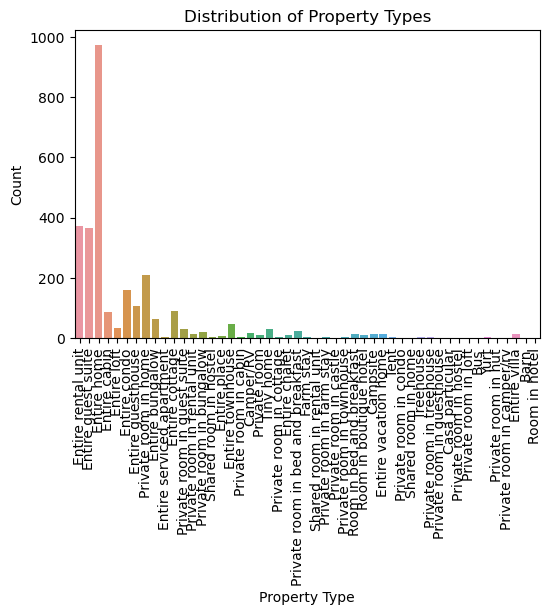

In [69]:
# Property type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='property_type')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

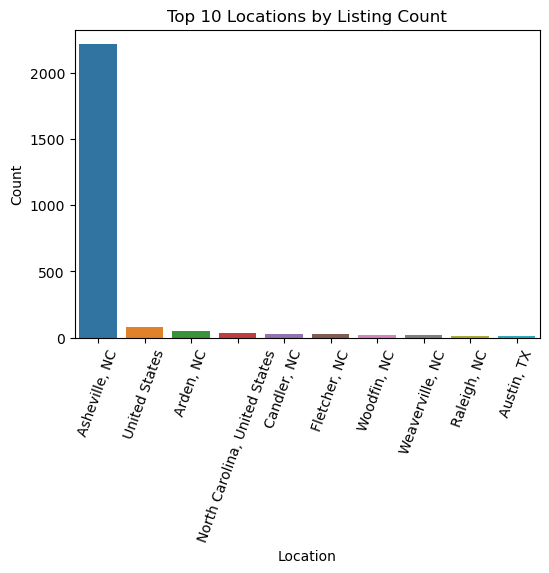

In [70]:
# Location analysis
top_locations = df['host_location'].value_counts().nlargest(10)
plt.figure(figsize=(6, 4))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations by Listing Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

# Statistical Analysis

In [71]:
# Statistical Analysis
average_price_by_location = df.groupby('host_location')['price'].mean().sort_values(ascending=False)
median_price_by_location = df.groupby('host_location')['price'].median().sort_values(ascending=False)

In [72]:
# Print average and median prices for top locations
top_location_stats = pd.DataFrame({'Average Price': average_price_by_location[top_locations.index],
                                   'Median Price': median_price_by_location[top_locations.index]})
print(top_location_stats)

                               Average Price  Median Price
Asheville, NC                     170.967028         131.0
United States                     185.101266         152.0
Arden, NC                         109.959184         101.0
North Carolina, United States     130.741935          99.0
Candler, NC                       165.233333         149.5
Fletcher, NC                      140.518519         120.0
Woodfin, NC                       147.000000         118.0
Weaverville, NC                   169.823529         149.0
Raleigh, NC                       163.071429         155.0
Austin, TX                        260.500000         220.0


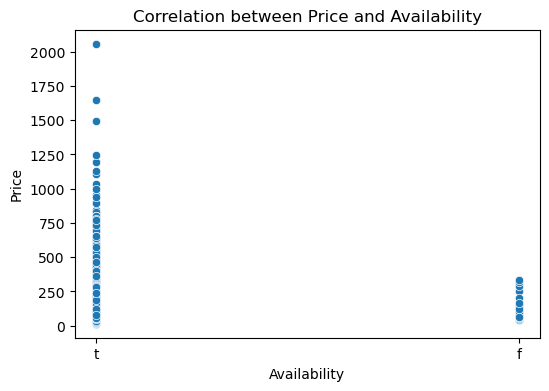

In [73]:
# Correlation between price and availability
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='has_availability', y='price')
plt.title('Correlation between Price and Availability')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.show()

In [74]:
# Save figures
plt.savefig('price_distribution.png')
plt.savefig('property_type_distribution.png')
plt.savefig('top_locations.png')
plt.savefig('price_vs_availability.png')

<Figure size 640x480 with 0 Axes>